# Cleaned Census Income: EDA

### By Mohan Bakshi

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np

In [60]:
# Importing census dataset about the adult income in the USA

df = pd.read_csv('datasets/cleaned_census_income.csv')
print(df.shape)


(30162, 15)


The shape of the cleaned_census_income df is (30162, 15), which means it has 30162 rows (instances) and 15 columns (features or variables).

In [61]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
5,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
6,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
7,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
8,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
9,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [3]:
# Classify column into categorical and Quantitative variable

def classify_col(df: pd.DataFrame):
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(df.columns) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols)) 

cat_cols, quan_cols = classify_col(df)

print(f' \n Categorical columns:\n {cat_cols}')
print(f' \n Quantitative columns:\n {quan_cols}')

 
 Categorical columns:
 ['relationship', 'race', 'sex', 'marital.status', 'income', 'workclass', 'occupation', 'native.country', 'education']
 
 Quantitative columns:
 ['fnlwgt', 'capital.loss', 'age', 'capital.gain', 'education.num', 'hours.per.week']


1. **Categorical Variables:** They represent non-numeric categories or groups.
   
   - **1. Relationship:** This variable likely represents the relationship status of individuals, such as "Unmarried," "Other-relative," "not-in-family," etc. These are discrete categories that do not have a numerical order.
     
   - **2. Race:** This variable indicates the racial background or ethnicity of individuals, such as "White," "Black," etc. Race is a categorical variable as it represents distinct categories.
  
   - **3. Sex:** This variable represents the gender of individuals, typically categorized as "male" or "female." Gender is a categorical variable with two distinct categories.
  
   - **4. Marital Status:** This variable indicates the marital status of individuals, such as "married," "never-married," "divorced," etc. Marital status is a categorical variable with discrete categories.
     
   - **5. Income:** Income is likely categorized into income brackets or ranges, such as "<=50K," ">50K," etc. These categories are discrete and non-numeric.
   - **6. Workclass:** This variable represents the type of employment or work class of individuals, such as "private," "Federal-gov," "State-government," etc. Workclass is a categorical variable as it represents distinct categories of employment.
     
   - **7. Occupation:** This variable likely represents the occupation or job type of individuals, such as "Other-service," "Prof-specialty," "Exec-managerial," etc. Occupation is categorical as it categorizes different job types.
  
   - **8. Native Country:** This variable indicates the country of origin or nationality of individuals, such as "United States," "Mexico," "India," etc. Native country is categorical as it represents distinct countries or regions.
     
   - **9. Education:** This variable represents the educational level or degree of individuals, such as "high school graduate," "bachelor's degree," "master's degree," etc. Education is categorical as it categorizes different levels of education.

2. **Quantitative Variables:** Quantitative variables are typically numerical and can be measured or quantified
   
   - **1. nlwgt:** This variable is likely a weight or sampling weight, which is a numerical value.
     
   - **2. Capital Loss:** Capital loss is a numerical variable representing financial losses.
     
   - **3. Age:** Age is a numerical variable representing the age of individuals.
     
   - **4. Capital Gain:** Capital gain is a numerical variable representing financial gains.
     
   - **5. Education Num:** This variable may represent the level of education numerically, such as assigning a numerical value to different education levels.
     
   - **6. Hours per Week:** This variable represents the number of hours worked per week, which is a numerical value. 

### Questions about examining distribution of one categorical variable

In [4]:
def var_desc(df: pd.DataFrame, var: str):
    print('1. \033[1mDescription\033[0m \n')
    
    # Describing the variable
    desc = df[var].describe() 
    
    # Converting the description into a string
    lines = str(desc).strip().split('\n') 
    
    # Creating empty dict. for dynamic description
    description_dict = {} 
    
    # Processing each line to extract key-value pairs in order to print dynamic observation
    for line in lines:
        key_value = line.split()
        key = key_value[0]
        value = ' '.join(key_value[1:])
        description_dict[key] = value
    
    observation_str = f"""
---------------------------------------------------------------------------
Based on the description of \033[1m{var}\033[0m variable, we can observe that -

1. The total number of observations for the variable is \033[1m{description_dict['count']}\033[0m.
2. There are \033[1m{description_dict['unique']}\033[0m unique categories in the variable.
3. The most frequent category (mode) in the variable is \033[1m{description_dict['top']}\033[0m, with a frequency of \033[1m{description_dict['freq']}\033[0m occurrences.
---------------------------------------------------------------------------
"""
    # Displaying the description of the variable
    display(desc)
    # Displaying the observation of the variable
    print(observation_str)

def frequency_dis(df: pd.DataFrame, var: str):    
    print('\n\n 2. \033[1mFrequency Distribution\033[0m \n')
    freq_desc = df[var].value_counts()
    # Displaying the description of the variable
    display(freq_desc)

def bar_chart(df: pd.DataFrame, var: str):
    print(f'\n3. Bar chart for \033[1m{var}\033[0m variable \n')
    plt.figure(figsize=(10, 6))
    df.groupby(var).size().plot(kind = 'bar', rot = 15)

def pie_plot(df: pd.DataFrame, var: str):
    print(f'\n4. Pie chart for \033[1m{var}\033[0m variable \n')
    plt.figure(figsize=(10, 6))
    sizes = df.groupby(var).size()
    patches, labels, _ = plt.pie(sizes, labels=sizes.index, autopct='', pctdistance=0.83)
    
    # Adding percentages to legend labels
    percentage_labels = [f'{label} ({size:.2f}%)' for label, size in zip(sizes.index, sizes / sizes.sum() * 100)]
    plt.legend(patches, percentage_labels, loc='best', bbox_to_anchor=(1.2, 0.3, 0.5, 0.5))
    
    plt.show()

#### Q3) Examine distribution of Workclass variable

In [5]:
var_desc(df, 'workclass')

1. Description 



count       30162
unique          7
top       Private
freq        22286
Name: workclass, dtype: object


---------------------------------------------------------------------------
Based on the description of workclass variable, we can observe that -

1. The total number of observations for the variable is 30162.
2. There are 7 unique categories in the variable.
3. The most frequent category (mode) in the variable is Private, with a frequency of 22286 occurrences.
---------------------------------------------------------------------------



In [6]:
frequency_dis(df, 'workclass')



 2. Frequency Distribution 



workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64


* The <b>Private</b> category is the most frequent workclass, followed by <b>Self-emp-not-inc</b> and <b>Local-gov</b>.

* <b>Without-pay</b> is the least frequent workclass category, with only <b>14 occurrences</b>.

Overall, the 'workclass' variable shows a diverse distribution across several categories, with </b>Private</b> being the most common workclass among the observations.


3. Bar chart for workclass variable 



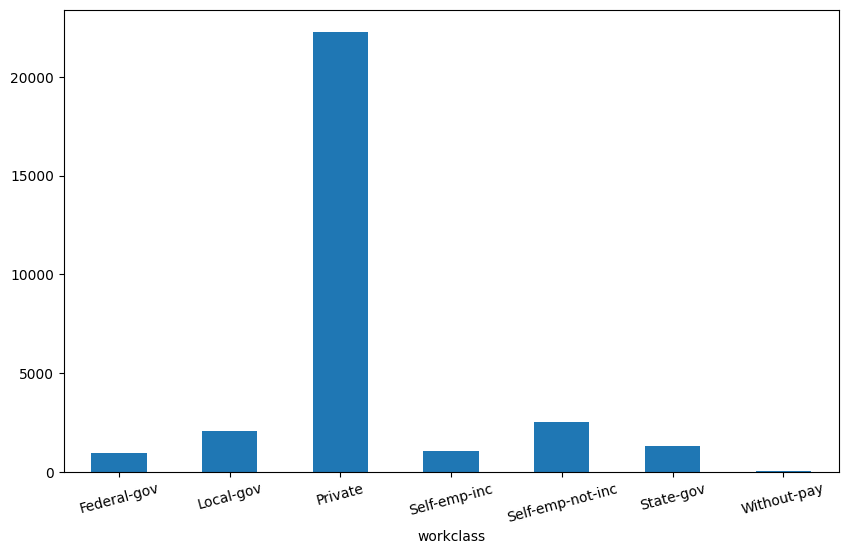

In [7]:
bar_chart(df, 'workclass')

This bar graph visualises categorical data for Workclass. Each bar represents a category, and its height indicates the frequency or count of observations in that category.

- The bar indicating Federal-gov represents the number of Federal Government workclass in the dataset. 
- The bar indicating Local-gov represents the number of Local government Government workclass in the dataset. 
- The bar indicating Private represents the number of Private workclass in the dataset. 
- The bar indicating Self-emp-inc represents the number of Self Employee workclass in the dataset. 
- The bar indicating State-gov represents the number of State Government workclass in the dataset. 
- The bar indicating without-pay represents the number of Without pay workclass in the dataset. 

A taller bar indicates a higher number of Private workclass compare to other workclass.


4. Pie chart for workclass variable 



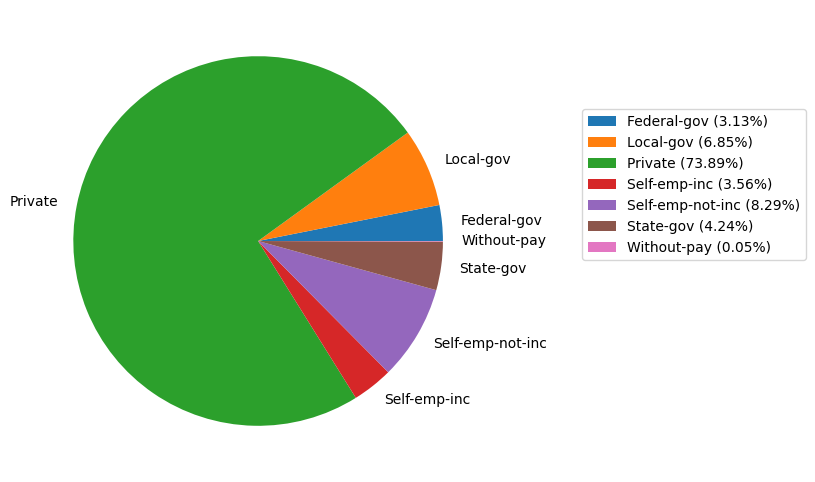

In [8]:
pie_plot(df, 'workclass')

This pie chart depicts the distribution of Workclass in the dataset. 

It highlights the proportion of Workclass as: 
- Federal-gov: 3.13%
- Local-gov: 6.85% 
- <b> Private: 73.89%</b>
- Self-emp-inc: 3.56%
- Self-emp-not-inc: 8.29%
- State-gov: 4.24%
- <b> without-pay: 0.05% </b>

#### Q4) Examine distribution of Education variable

In [9]:
var_desc(df, 'education')

1. Description 



count       30162
unique         16
top       HS-grad
freq         9840
Name: education, dtype: object


---------------------------------------------------------------------------
Based on the description of education variable, we can observe that -

1. The total number of observations for the variable is 30162.
2. There are 16 unique categories in the variable.
3. The most frequent category (mode) in the variable is HS-grad, with a frequency of 9840 occurrences.
---------------------------------------------------------------------------



In [10]:
frequency_dis(df, 'education')



 2. Frequency Distribution 



education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

* The <b>HS-grad</b> category is the most frequent education, followed by <b>Some-college</b> and <b>Bachelors</b>.

* <b>Preschool</b> is the least frequent Education category, with only <b>45 occurrences</b>.

Overall, the 'Education' variable shows a diverse distribution across several categories, with </b>HS-grad</b> being the most common Education among the observations.


3. Bar chart for education variable 



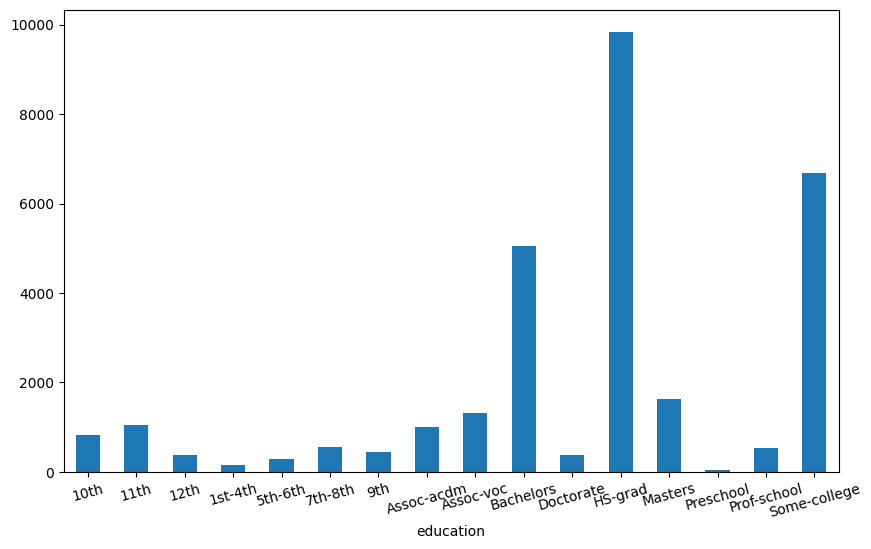

In [11]:
bar_chart(df, 'education')

**Educational Levels:** The bar chart visually represents the distribution of individuals across different education levels. Each bar corresponds to an education category such as "HS-grad," "Some-college," "Bachelors," "Masters," and so on, with the height of the bar indicating the frequency count or proportion of individuals in that education category.

**Common Education Levels:** In the bar chart, categories with taller bars, such as "HS-grad," "Some-college," and "Bachelors," are more common in the dataset, indicating a higher representation of individuals with these education levels.

**Higher Education Levels:** Categories representing higher education levels, such as "Masters," "Doctorate," and "Prof-school," may have shorter bars, indicating their lower frequency counts compared to lower education levels.

**Education Diversity:** The bar chart visually showcases the diversity of education levels in the dataset, ranging from preschool to doctorate degrees.


4. Pie chart for education variable 



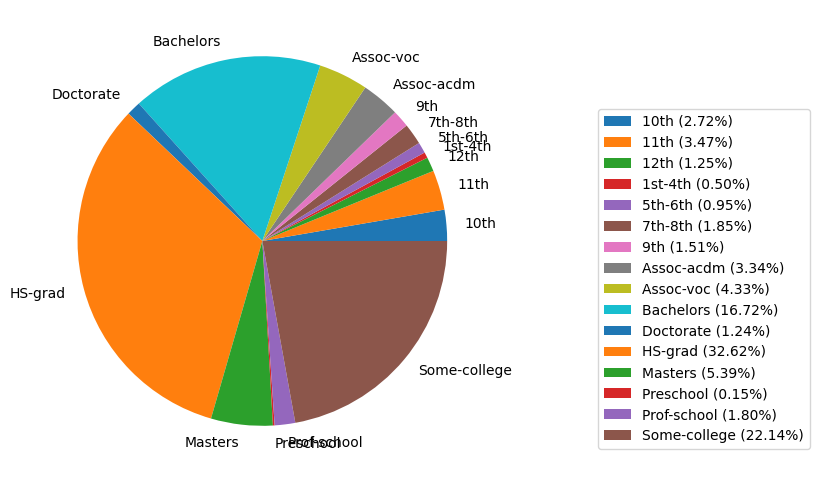

In [12]:
pie_plot(df, 'education')

**Education Proportions:** The pie chart visually illustrates the proportions of individuals across different education categories. Each sector of the pie corresponds to an education category, and the size of the sector represents the proportion or percentage of individuals in that education category relative to the total.

**Common Education Categories:** Larger sectors in the pie chart correspond to more common education categories such as "HS-grad," "Some-college," and "Bachelors," indicating their higher representation in the dataset.

**Higher Education Categories:** Smaller sectors in the pie chart represent less common education categories such as "Masters," "Doctorate," and "Prof-school," indicating their lower representation in the dataset compared to lower education levels.

#### Q5) Examine distribution of Marital.status variable

In [13]:
var_desc(df, 'marital.status')

1. Description 



count                  30162
unique                     7
top       Married-civ-spouse
freq                   14065
Name: marital.status, dtype: object


---------------------------------------------------------------------------
Based on the description of marital.status variable, we can observe that -

1. The total number of observations for the variable is 30162.
2. There are 7 unique categories in the variable.
3. The most frequent category (mode) in the variable is Married-civ-spouse, with a frequency of 14065 occurrences.
---------------------------------------------------------------------------



In [14]:
frequency_dis(df, 'marital.status')



 2. Frequency Distribution 



marital.status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

* The <b>Married-civ-spouse</b> category is the most frequent Marital status, followed by <b>Never-married</b> and <b>Divorced</b>.

* <b>Married-AF-spouse</b> is the least frequent Marital status category, with only <b>21 occurrences</b>.

Overall, the 'Marital Status' variable shows a diverse distribution across several categories, with </b>Married-civ-spouse</b> being the most common Marital Status among the observations.


3. Bar chart for marital.status variable 



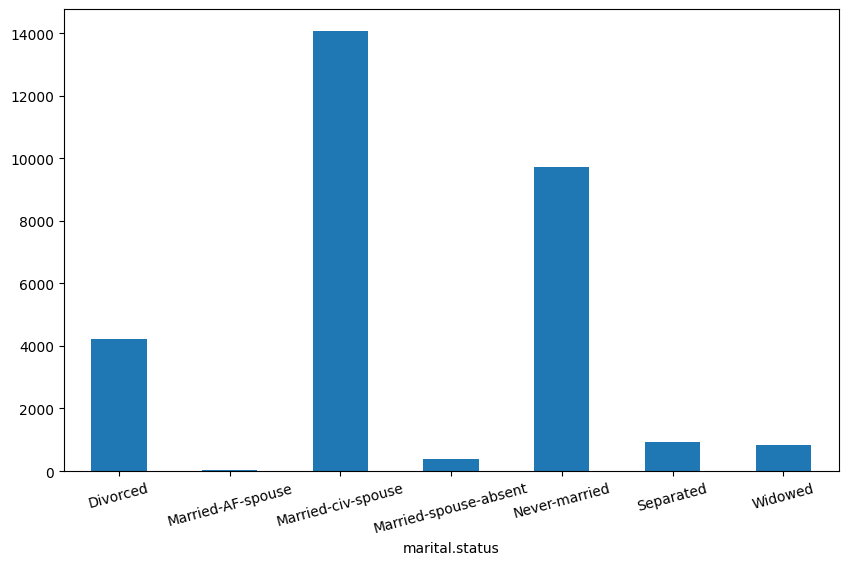

In [15]:
bar_chart(df, 'marital.status')

**Marital Status Distribution:** The bar chart visually represents the distribution of individuals across different marital status categories. Each bar corresponds to a marital status category such as "Married-civ-spouse," "Never-married," "Divorced," "Separated," and so on, with the height of the bar indicating the frequency count or proportion of individuals in that marital status category.

**Common Marital Status:** In the bar chart, categories with taller bars, such as "Married-civ-spouse" and "Never-married," are more common in the dataset, indicating a higher representation of individuals with these marital statuses.

**Less Common Marital Status:** Categories with shorter bars, such as "Married-spouse-absent" and "Married-AF-spouse," represent less common marital statuses, indicating their lower frequency counts compared to more common statuses.

**Marital Status Diversity:** The bar chart visually showcases the diversity of marital statuses in the dataset, ranging from married categories to never-married, divorced, separated, widowed, and other categories.


4. Pie chart for marital.status variable 



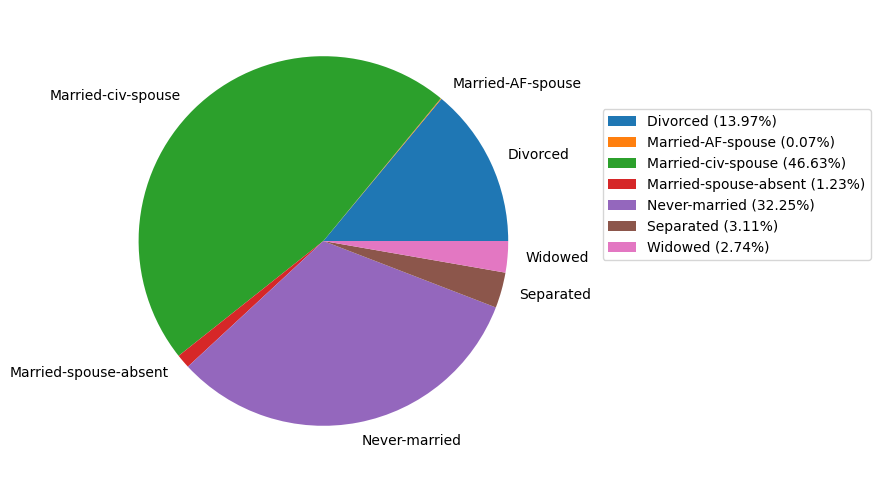

In [16]:
pie_plot(df, 'marital.status')

**Marital Status Proportions:** The pie chart visually illustrates the proportions of individuals across different marital status categories. Each sector of the pie corresponds to a marital status category, and the size of the sector represents the proportion or percentage of individuals in that marital status category relative to the total.

**Common Marital Status Categories:** Larger sectors in the pie chart correspond to more common marital status categories such as "Married-civ-spouse" and "Never-married," indicating their higher representation in the dataset.

**Less Common Marital Status Categories:** Smaller sectors in the pie chart represent less common marital status categories such as "Separated," "Widowed," "Married-spouse-absent," and "Married-AF-spouse," indicating their lower representation in the dataset compared to more common statuses.

#### Q6) Examine distribution of Occupation variable

In [17]:
var_desc(df, 'occupation')

1. Description 



count              30162
unique                14
top       Prof-specialty
freq                4038
Name: occupation, dtype: object


---------------------------------------------------------------------------
Based on the description of occupation variable, we can observe that -

1. The total number of observations for the variable is 30162.
2. There are 14 unique categories in the variable.
3. The most frequent category (mode) in the variable is Prof-specialty, with a frequency of 4038 occurrences.
---------------------------------------------------------------------------



In [18]:
frequency_dis(df, 'occupation')



 2. Frequency Distribution 



occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

* The <b>Prof-specialty</b> category is the most frequent Occupation, followed by <b>Craft-repair</b> and <b>Exec-managerial</b>.

* <b>Armed-Forces</b> is the least frequent Marital status category, with only <b>9 occurrences</b>.

Overall, the 'Occupation' variable shows a diverse distribution across several categories, with </b>Prof-specialty</b> being the most common Occupation among the observations.


3. Bar chart for occupation variable 



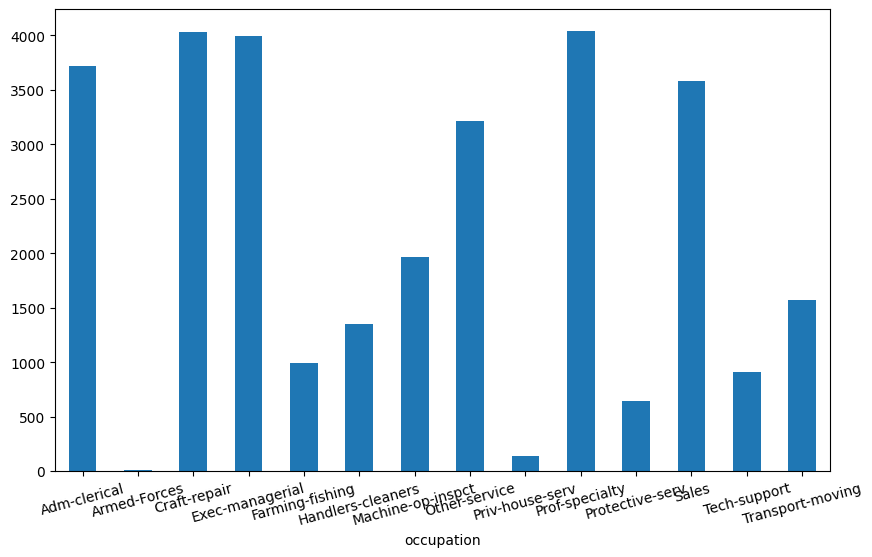

In [19]:
bar_chart(df, 'occupation')

Based on the bar chart of occupations in the dataset, several key observations can be made:

1. **Occupation Diversity:** The dataset covers a wide range of occupations, including professional specialties, managerial roles, clerical positions, sales, service roles, and various other categories. This diversity indicates a heterogeneous population with diverse occupational backgrounds.

2. **Common Occupations:** The most common occupations based on frequency counts include "Prof-specialty," "Craft-repair," "Exec-managerial," "Adm-clerical," "Sales," and "Other-service." These occupations have higher representation in the dataset compared to others.

3. **Specialized Roles:** Certain occupations such as "Tech-support," "Protective-serv," "Priv-house-serv," and "Armed-Forces" have relatively lower frequencies, indicating that these roles may be more specialized or less common within the dataset.

4. **Occupation Distribution:** The distribution of occupations in the dataset is not evenly distributed, with some occupations having significantly higher representation than others.



4. Pie chart for occupation variable 



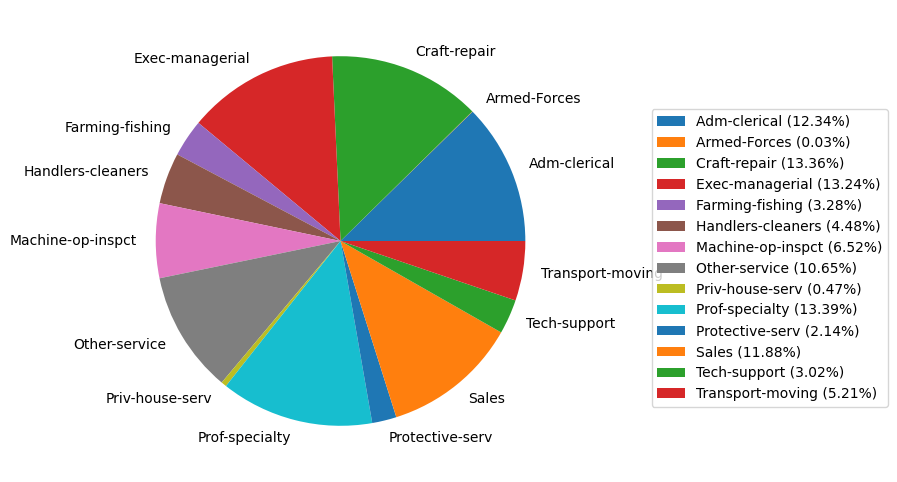

In [20]:
pie_plot(df, 'occupation')

1. **Occupation Proportions:** The pie chart visually shows the proportion of each occupation category relative to the total. Each sector of the pie represents a different occupation category, and the size of the sector corresponds to the frequency count or proportion of individuals in that occupation.

2. **Major Occupations:** Larger sectors in the pie chart correspond to occupations with higher frequency counts. For example, "Prof-specialty," "Craft-repair," "Exec-managerial," "Adm-clerical," "Sales," and "Other-service" are likely to occupy larger portions of the pie, indicating their commonness in the dataset.

3. **Minor Occupations:** Smaller sectors in the pie chart represent less common occupations with lower frequency counts. Occupations such as "Tech-support," "Protective-serv," "Priv-house-serv," and "Armed-Forces" are likely to have smaller pie sectors, indicating their lower representation in the dataset.

4. **Occupation Diversity:** The pie chart visually showcases the diversity of occupations in the dataset.

#### Q7) Examine distribution of Sex variable

In [21]:
var_desc(df, 'sex')

1. Description 



count     30162
unique        2
top        Male
freq      20380
Name: sex, dtype: object


---------------------------------------------------------------------------
Based on the description of sex variable, we can observe that -

1. The total number of observations for the variable is 30162.
2. There are 2 unique categories in the variable.
3. The most frequent category (mode) in the variable is Male, with a frequency of 20380 occurrences.
---------------------------------------------------------------------------



In [22]:
frequency_dis(df, 'sex')



 2. Frequency Distribution 



sex
Male      20380
Female     9782
Name: count, dtype: int64

The <b>Male</b> category is the most frequent Gender, compared to <b>Female</b> with occurrence of 20,380 times compare to female occurrence i.e 9,782 times.


3. Bar chart for sex variable 



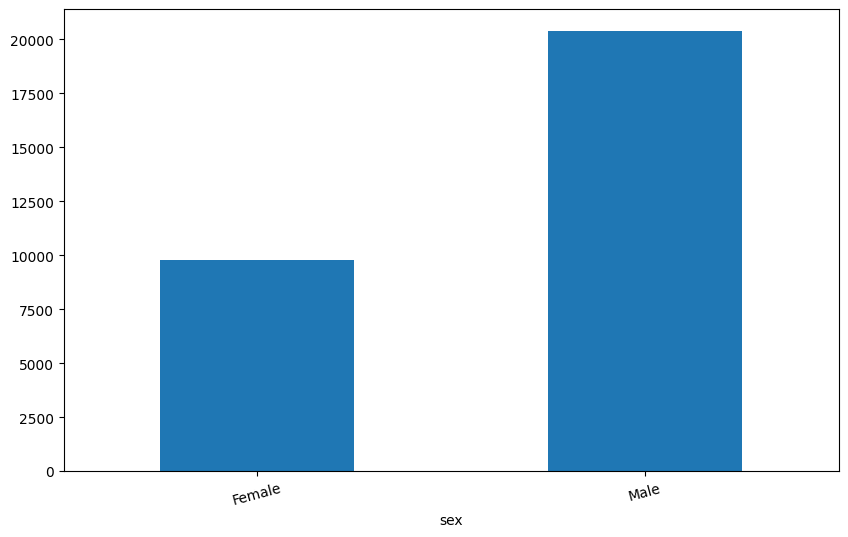

In [23]:
bar_chart(df, 'sex')

**Sex Representation:** The bar chart visually displays the representation of genders in the dataset. Each bar represents a gender category, either "Male" or "Female," and the height of the bar corresponds to the frequency count or proportion of individuals in that gender category.

**Male Dominance:** In the bar chart, the "Male" category is likely to have a taller bar compared to the "Female" category, indicating a higher frequency count of males in the dataset. This suggests that males are more represented in the dataset compared to females.

**Female Representation:** The "Female" category's bar, although shorter than the "Male" bar, still represents a significant proportion of the dataset. 


4. Pie chart for sex variable 



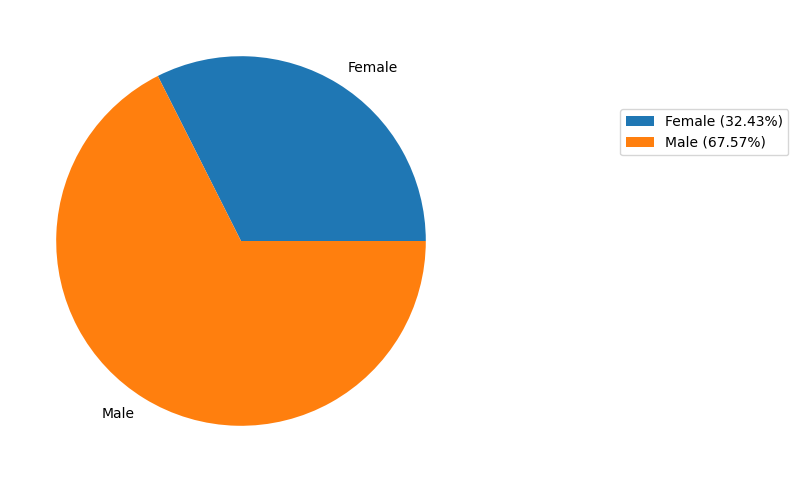

In [24]:
pie_plot(df, 'sex')

**Gender Proportions:** The pie chart visually represents the proportions of males and females in the dataset. Each sector of the pie corresponds to a gender category, and the size of the sector indicates the proportion or percentage of individuals in that gender category relative to the total.

**Male Dominance:** The pie chart shows a larger sector for "Male" compared to "Female," indicating a higher percentage of males in the dataset. This dominance of males is evident in the larger sector size for the "Male" category.

**Female Representation:** Although the "Female" sector may be smaller, it still represents a significant percentage of the dataset.

### Questions about examining distribution of one quantitative variable

#### Q8) Examine distribution of age variable

Text(0.5, 1.0, 'Histogram of Ages')

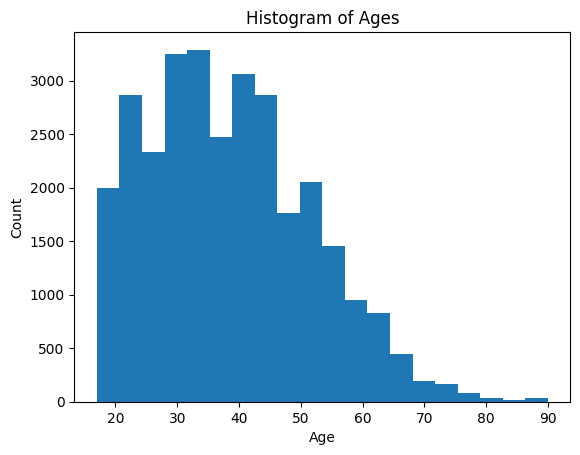

In [25]:
plt.hist(x = df['age'], bins = 20, histtype='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages')

This histogram visualisation depicts the distribution of ages in the dataset. It illustrates how the ages are distributed over various intervals or bins.

**Shape** - This histogram has a skewed right distribution. A few ages are more insured than others.

**Centre** - The data appears to be centred about 30-32 years old.

**Spread** - The data runs from 17 to 90, hence the approximate range is 73.

**Outliers** - There appears to be few possible outlier near histogram tail.

In [26]:
df['age'].mode()

0    36
Name: age, dtype: int64

The mode of the **Age** variable is 36. This means that 36 is the most frequent age value in the dataset, occurring more often than any other age value.

In [27]:
df['age'].median()

37.0

The median age is 37.0. This represents the middle value of the dataset when all ages are arranged in ascending order. It indicates that half of the individuals in the dataset are older than 37 years, and half are younger.

In [28]:
df['age'].mean()

38.437901995888865

The mean age is approximately 38.44. This is the average age of individuals in the dataset, calculated by summing all age values and dividing by the total number of observations (count).

In [29]:
min_ = df['age'].min()
max_ = df['age'].max()
range_ = max_ - min_

print(f' \n Min = {min_} \n Max = {max_} \n Range = {range_}')

 
 Min = 17 
 Max = 90 
 Range = 73


**Minimum Age:** The minimum age in the dataset is 17 years, indicating that the youngest individual in the dataset is 17 years old.

**Maximum Age:** The maximum age in the dataset is 90 years, indicating that the oldest individual in the dataset is 90 years old.

**Range:** The range of ages in the dataset is 73 years, calculated as the the difference between the maximum age (90 years) and the minimum age (17 years).

In [30]:
Q25 = df['age'].quantile(0.25)
Q75 = df['age'].quantile(0.75)
IQR = Q75 - Q25

age_outliers = df[(df.age < Q25 - 1.5*IQR)|(df.age > Q75 + 1.5*IQR)]['age']

print(f' \n Q25 = {Q25} \n Q75 = {Q75} \n IQR = {IQR}\n Outlier = {age_outliers}')

 
 Q25 = 28.0 
 Q75 = 47.0 
 IQR = 19.0
 Outlier = 0        82
102      78
104      83
114      81
179      90
         ..
28936    90
29556    80
29589    82
29928    90
30081    85
Name: age, Length: 169, dtype: int64


**First Quartile (Q1):** The first quartile (Q1) of the "age" variable is 28.0. This means that 25% of the individuals in the dataset are aged 28 years or younger.

**Third Quartile (Q3):** The third quartile (Q3) of the "age" variable is 47.0. This indicates that 75% of the individuals in the dataset are aged 47 years or younger.

**Interquartile Range (IQR):** The interquartile range (IQR) for the "age" variable is 19.0, calculated as the difference between Q3 (47.0) and Q1 (28.0). The IQR represents the spread of the middle 50% of the data.

**Outliers:** There are 82 outliers identified in the "age" variable based on the IQR method. Outliers are values that are significantly higher or lower than the rest of the data and are often considered to be unusual or extreme observations. In this case, the outliers have ages ranging from 78 to 90 years.

In [31]:
age_std = df['age'].std()
age_std

13.134664776855985

Text(0, 0.5, 'Age')

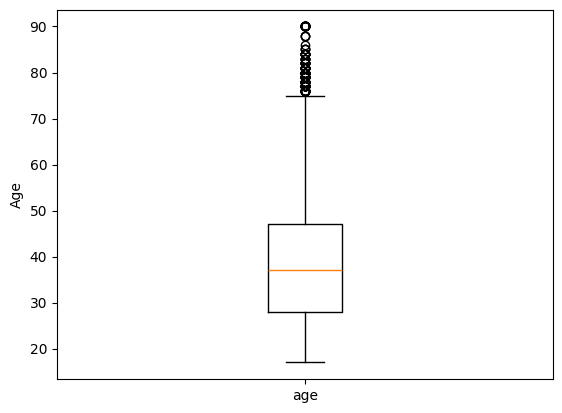

In [32]:
plt.boxplot(x=df['age'], labels = ['age'])
plt.ylabel('Age')

The 25th percentile (Q1 or Q25) is 28.0. This means that 25% of the individuals in the dataset are aged 28 years or younger.

The 75th percentile (Q3 or Q75) is 47.0. This indicates that 75% of the individuals in the dataset are aged 47 years or younger.

The interquartile range (IQR) is 19.0

The boxplot shows significant outliers above 78 Age.

#### Q9) Examine distribution of education.num variable

Text(0.5, 1.0, 'Histogram of Education Number')

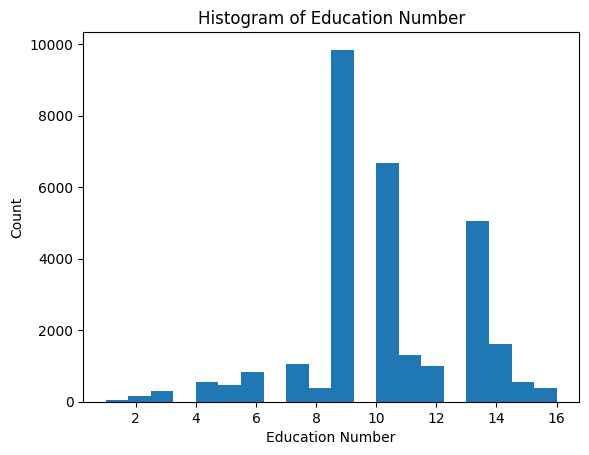

In [33]:
plt.hist(x = df['education.num'], bins = 20, histtype='bar')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.title('Histogram of Education Number')

**Shape:** The histogram is skewed to the left.

**Centre:** The centre of the distribution is difficult to pinpoint from the histogram, although it appears to be around 9. This is the most usual educational frequency in the sample.

**Spread:** The data is moderately to widely distributed. The data points are dispersed across a wide range of education number, although the majority of persons appear to have an education level between 4 and 16.

In [34]:
df['education.num'].mode()

0    9
Name: education.num, dtype: int64

The mode of the "education.num" variable is 9, indicating that it appears most frequently in the dataset.

In [35]:
df['education.num'].median()

10.0

The median of the "education.num" variable is 10.0, which represents the middle value of the sorted dataset.

In [36]:
df['education.num'].mean()

10.12131158411246

The mean of the "education.num" variable is approximately 10.12

In [37]:
min_ = df['education.num'].min()
max_ = df['education.num'].max()
range_ = max_ - min_

print(f' \n Min = {min_} \n Max = {max_} \n Range = {range_}')

 
 Min = 1 
 Max = 16 
 Range = 15


Minimum Value (Min): The minimum value is 1, indicating the lowest level of education in the dataset.

Maximum Value (Max): The maximum value is 16, representing the highest level of education achieved.

Range: The range of the variable is 15, calculated as the difference between the maximum and minimum values.

In [38]:
Q25 = df['education.num'].quantile(0.25)
Q75 = df['education.num'].quantile(0.75)
IQR = Q75 - Q25

education_num_outliers = df[(df['education.num'] < Q25 - 1.5*IQR)|(df['education.num'] > Q75 + 1.5*IQR)]['education.num']

print(f' \n Q25 = {Q25} \n Q75 = {Q75} \n IQR = {IQR}\n Outlier = {education_num_outliers}')

 
 Q25 = 9.0 
 Q75 = 13.0 
 IQR = 4.0
 Outlier = 20       2
197      2
1022     2
1050     1
1096     1
        ..
29954    2
29997    1
30034    2
30054    2
30060    1
Name: education.num, Length: 196, dtype: int64


The first quartile (Q1) is 9.0.

The third quartile (Q3) is 13.0.

The interquartile range (IQR) is 4.0.

There are outliers identified in the "education.num" variable.


In [39]:
education_num_std = df['education.num'].std()
education_num_std

2.549994918856736

Text(0, 0.5, 'Number')

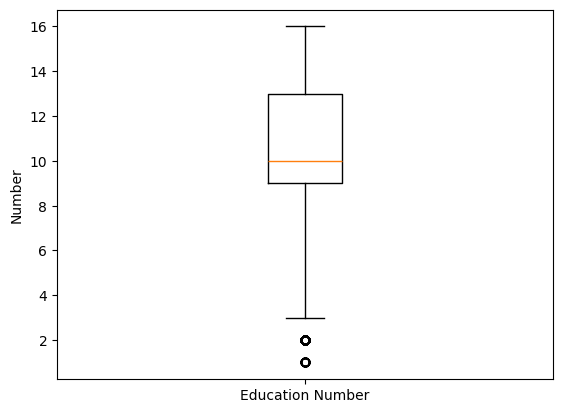

In [40]:
plt.boxplot(x=df['education.num'], labels = ['Education Number'])
plt.ylabel('Number')

The 25th percentile (Q1 or Q25) is 9.0. This means that 25% of the individuals in the dataset are having education number equal or below 9.

The 75th percentile (Q3 or Q75) is 13.0. This indicates that 75% of the individuals in the dataset have education level below or equal to 13.

The interquartile range (IQR) is 4.0

The boxplot shows few outliers below Education number 2.

#### Q10) Examine distribution of hours.per.week variable

Text(0.5, 1.0, 'Histogram of Hours per Week')

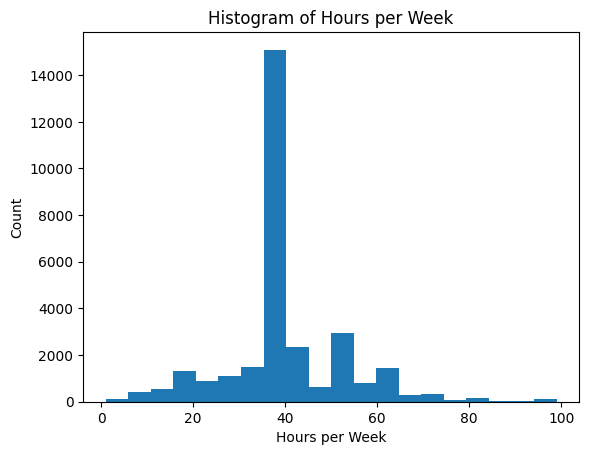

In [41]:
plt.hist(x = df['hours.per.week'], bins = 20, histtype='bar')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Histogram of Hours per Week')

**Shape:** The histogram is Symmetrical in term of shape.

**Centre:** The centre of the distribution is difficult to pinpoint using the histogram, although it appears to be about 40 hours each week. This is the most common number of weekly hours worked in the sample.

**Spread:** The data is moderately to widely distributed. The data points span a wide range of hours, although most people appear to work between 20 and 60 hours per week.

In [42]:
df['hours.per.week'].mode()

0    40
Name: hours.per.week, dtype: int64

The mode of the "hours.per.week" variable is 40, indicating that it appears most frequently in the dataset.

In [43]:
df['hours.per.week'].median()

40.0

The median of the "education.num" variable is 40.0

In [44]:
df['hours.per.week'].mean()

40.93123798156621

The mean of the "education.num" variable is approximately 10.12

``NOTE: As we observe, the mean, mode and median are same hence, it is confirm that the histogram is symmetrical in shape.``

In [45]:
min_ = df['hours.per.week'].min()
max_ = df['hours.per.week'].max()
range_ = max_ - min_

print(f' \n Min = {min_} \n Max = {max_} \n Range = {range_}')

 
 Min = 1 
 Max = 99 
 Range = 98


Minimum Value (Min): The minimum value is 1, indicating the lowest number of hours worked per week in the dataset.

Maximum Value (Max): The maximum value is 99, representing the highest number of hours worked per week.
    
Range: The range of the variable is 98, calculated as the difference between the maximum and minimum values

In [46]:
Q25 = df['hours.per.week'].quantile(0.25)
Q75 = df['hours.per.week'].quantile(0.75)
IQR = Q75 - Q25

hours_per_week_outliers = df[(df['hours.per.week'] < Q25 - 1.5*IQR)|(df['hours.per.week'] > Q75 + 1.5*IQR)]['hours.per.week']

print(f' \n Q25 = {Q25} \n Q75 = {Q75} \n IQR = {IQR}\n Outlier = {hours_per_week_outliers}')

 
 Q25 = 40.0 
 Q75 = 45.0 
 IQR = 5.0
 Outlier = 0        18
5        20
9        20
10       55
12       76
         ..
30143    55
30147    30
30148    20
30155    11
30161    20
Name: hours.per.week, Length: 7953, dtype: int64


First Quartile (Q1) = 40.0 hours: 25% of the data points have a value of 40 hours or less per week.

Third Quartile (Q3) = 45.0 hours: 75% of the data points have a value of 45 hours or less per week.

Interquartile Range (IQR) = Q3 - Q1 = 45.0 - 40.0 = 5.0 hours: The middle 50% of the data falls within this range.

Outliers: The outliers in the dataset for this variable are values that fall below Q1 - 1.5 * IQR (18.5 hours) or above Q3 + 1.5 * IQR (66.5 hours). There are 7953 data points classified as outliers based on this criterion.

In [47]:
hours_per_week_std = df['hours.per.week'].std()
hours_per_week_std

11.979984229274882

Text(0, 0.5, 'Hour')

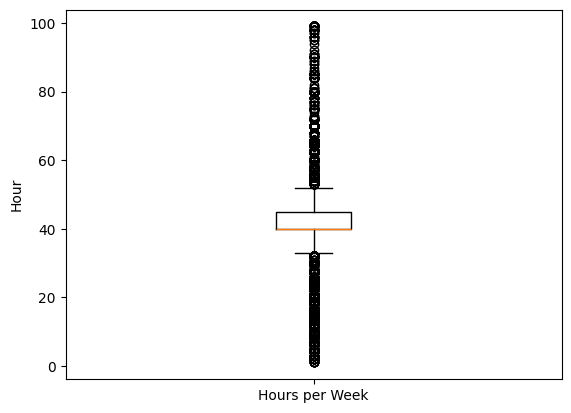

In [48]:
plt.boxplot(x=df['hours.per.week'], labels = ['Hours per Week'])
plt.ylabel('Hour')

The 25th percentile (Q1 or Q25) is 40.0. This means that 25% of the data points have a value of 40 hours or less per week.

The 75th percentile (Q3 or Q75) is 45.0. This indicates that 75% of the data points have a value of 45 hours or less per week.

The median of the boxplot is 40.

The boxplot shows significant amounts of outliers.